In [1]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
import numpy as np

In [2]:
lr = pd.read_csv(r'CreditRisk.csv')

In [3]:
lr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
lr.shape

(981, 13)

In [5]:
lr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
lr.Gender = lr.Gender.fillna('Male')
lr.Married = lr.Married.fillna('NO')
lr.Self_Employed = lr.Self_Employed.fillna('Yes')

In [7]:
lr.Dependents = lr.Dependents .fillna(0)
lr.LoanAmount = lr.LoanAmount.fillna(lr.LoanAmount.mean())
lr.Loan_Amount_Term = lr.Loan_Amount_Term.fillna(lr.Loan_Amount_Term.mean())
lr.Credit_History= lr.Credit_History.fillna(0)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lr[lr.select_dtypes(include = ['object']).columns]= lr[lr.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [9]:
lr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,2,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,2,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,2,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,1,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [10]:
from sklearn.model_selection import train_test_split
lr_train,lr_test = train_test_split(lr, test_size = .2)

In [11]:
lr_train_x = lr_train.iloc[:,0:-1]
lr_train_y = lr_train.iloc[:,-1]

In [12]:
lr_test_x = lr_test.iloc[:,0:-1]
lr_test_y = lr_test.iloc[:,-1]

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logi_lr = LogisticRegression()

In [15]:
logi_lr.fit(lr_train_x,lr_train_y)

D:\Anaconda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
pred = logi_lr.predict(lr_test_x)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
lr_tab = confusion_matrix(lr_test_y,pred)

In [19]:
lr_tab

array([[ 37,  24],
       [ 10, 126]], dtype=int64)

# Find The Accuracy

In [20]:
# total no of correct predictions

lr_tab.diagonal().sum() * 100 / lr_tab.sum() 

82.74111675126903

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(lr_test_y,pred) * 100

82.74111675126903

# recall(Tpr)

- Tp/ Tp + Fn

In [23]:
from sklearn.metrics import recall_score

In [24]:
recall_score(lr_test_y,pred)*100

92.64705882352942

# Precision(Hit Ratio)

- Tp/Tp+Fp

In [25]:
from sklearn.metrics import precision_score

In [26]:
precision_score(lr_test_y,pred)*100

84.0

# F1 Ratio

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(lr_test_y,pred)*100

88.1118881118881

# AUROC Curve

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [30]:
pred_prob = logi_lr.predict_proba(lr_test_x)
pred_prob

array([[0.09494579, 0.90505421],
       [0.48920392, 0.51079608],
       [0.09029594, 0.90970406],
       [0.15782568, 0.84217432],
       [0.50515124, 0.49484876],
       [0.2036467 , 0.7963533 ],
       [0.03629433, 0.96370567],
       [0.10257519, 0.89742481],
       [0.23410852, 0.76589148],
       [0.02967141, 0.97032859],
       [0.13570756, 0.86429244],
       [0.20930924, 0.79069076],
       [0.19185877, 0.80814123],
       [0.1238528 , 0.8761472 ],
       [0.21632516, 0.78367484],
       [0.15544926, 0.84455074],
       [0.16476521, 0.83523479],
       [0.13542756, 0.86457244],
       [0.1291067 , 0.8708933 ],
       [0.21580491, 0.78419509],
       [0.36843035, 0.63156965],
       [0.21231559, 0.78768441],
       [0.13134117, 0.86865883],
       [0.17779104, 0.82220896],
       [0.6650023 , 0.3349977 ],
       [0.09992162, 0.90007838],
       [0.19753616, 0.80246384],
       [0.11882311, 0.88117689],
       [0.66760255, 0.33239745],
       [0.13135715, 0.86864285],
       [0.

In [31]:
pred_q = logi_lr.predict(lr_test_x)
pred_q

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [32]:
roc_auc_score(lr_test_y, pred_q)

0.7665139826422371

In [33]:
pred_prob[:,1]

array([0.90505421, 0.51079608, 0.90970406, 0.84217432, 0.49484876,
       0.7963533 , 0.96370567, 0.89742481, 0.76589148, 0.97032859,
       0.86429244, 0.79069076, 0.80814123, 0.8761472 , 0.78367484,
       0.84455074, 0.83523479, 0.86457244, 0.8708933 , 0.78419509,
       0.63156965, 0.78768441, 0.86865883, 0.82220896, 0.3349977 ,
       0.90007838, 0.80246384, 0.88117689, 0.33239745, 0.86864285,
       0.16035721, 0.5078329 , 0.95739901, 0.51481986, 0.88584048,
       0.78251006, 0.91398693, 0.7740074 , 0.85159677, 0.79500232,
       0.81813793, 0.91233195, 0.88142797, 0.79610654, 0.25474473,
       0.2495741 , 0.86939027, 0.78312126, 0.80731824, 0.82091636,
       0.37991169, 0.83749972, 0.86128162, 0.32467014, 0.35066209,
       0.87115397, 0.82441104, 0.86837096, 0.8774568 , 0.46138057,
       0.81498271, 0.85921585, 0.25245653, 0.44977512, 0.86756741,
       0.42377305, 0.28972425, 0.72666852, 0.89968973, 0.83725839,
       0.72478733, 0.82630027, 0.81689364, 0.77000399, 0.87174

In [34]:
fpr, tpr, ther = roc_curve(lr_test_y,pred_prob[:,1])

In [35]:
import matplotlib.pyplot as plt

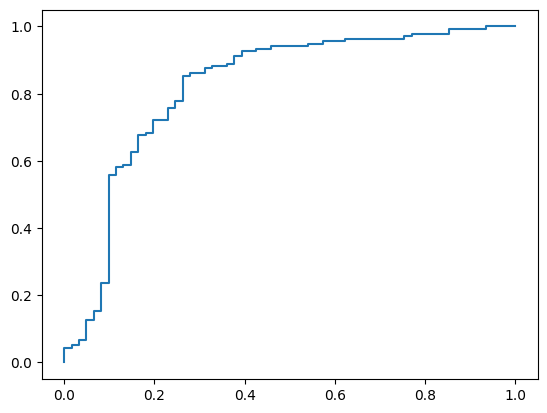

In [36]:
plt.plot(fpr,tpr)

Text(0.5, 0.5, 'AUROC score is 0.766513')

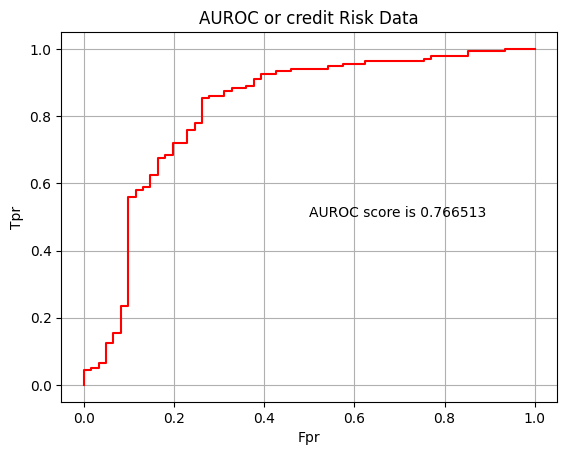

In [37]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC or credit Risk Data')
plt.grid()
plt.text(x=0.5,y=0.5, s= 'AUROC score is 0.766513')